
### Step 1: Import Libraries
In this step, we import the essential libraries for data handling (`pandas`, `numpy`), the Random Forest Classifier from `sklearn.ensemble`, and metrics functions for model evaluation.


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



### Step 2: Load Training and Validation Data
In this step:
- We load the training and validation datasets from the specified paths.
- Separate features (`X_train`, `X_val`) and labels (`y_train`, `y_val`) for each dataset.
- Finally, we confirm the shape of each data split to ensure that they are correctly loaded and separated.


In [ ]:
import os

# Define dataset filenames
train_data_file = "split_data/train_1_split.csv"
val_data_file = "split_data/val_1_split.csv"

# Construct dynamic paths based on the current working directory
current_dir = os.getcwd()
train_data_path = os.path.join(current_dir, "data/features", train_data_file)
val_data_path = os.path.join(current_dir, "data/features", val_data_file)

# Check if paths exist and notify if files are missing
if not os.path.isfile(train_data_path):
    print(f"Warning: {train_data_path} not found.")
if not os.path.isfile(val_data_path):
    print(f"Warning: {val_data_path} not found.")

# Load the training and validation datasets
train_data = pd.read_csv(train_data_path)
val_data = pd.read_csv(val_data_path)

# Separate features and labels for training and validation
X_train = train_data.drop(columns=['label'])
y_train = train_data['label']
X_val = val_data.drop(columns=['label'])
y_val = val_data['label']

# Confirm the shape of the datasets
print("Training Features Shape:", X_train.shape)
print("Training Labels Shape:", y_train.shape)
print("Validation Features Shape:", X_val.shape)
print("Validation Labels Shape:", y_val.shape)



Training Features Shape: (1024933, 177)
Training Labels Shape: (1024933,)
Validation Features Shape: (256234, 177)
Validation Labels Shape: (256234,)


## Step 3: Splitting the Dataset into Train and Validation Sets

In this step, we will take a subset of 50,000 samples from the training data for model training, ensuring that the class distribution remains balanced. We will use a stratified split to maintain the original label distribution.

1. **Subset Creation**: We are selecting a smaller portion of the training dataset (50,000 samples) to make the training process faster and more efficient for initial experimentation.
2. **Stratified Sampling**: To maintain the balance of the class labels, we will perform stratified sampling to ensure the sample represents the original dataset's distribution.
3. **Prepare for Model Training**: The final subsets will be ready for the upcoming training process in this notebook.

Now, let's proceed with the code.


In [ ]:
# Set sample size
sample_size = 50000

# Randomly sample 50,000 rows from the training data
X_train_sample = X_train.sample(n=sample_size, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Confirm the sample shape
print("Sampled Training Features Shape:", X_train_sample.shape)
print("Sampled Training Labels Shape:", y_train_sample.shape)


Sampled Training Features Shape: (50000, 177)
Sampled Training Labels Shape: (50000,)


### Step 5: Setting Up the Random Forest Classifier

In this step, we will set up the Random Forest Classifier, which is a powerful ensemble model. Random Forests combine the predictions of multiple decision trees to produce a more accurate and stable prediction.

1. **Define the Classifier**: We will instantiate the `RandomForestClassifier` from scikit-learn with default parameters. This can be tuned later as part of hyperparameter optimization.
2. **Train the Classifier**: We will fit the classifier to the sampled training data.
3. **Predict**: We will make predictions on the validation set.
4. **Evaluate**: Finally, we will evaluate the model using a classification report and accuracy score.

Let’s proceed with this step.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Define the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Step 2: Train the classifier on the sampled training data
rf_clf.fit(X_train_sample, y_train_sample)

# Step 3: Make predictions on the validation data
rf_y_pred = rf_clf.predict(X_val)

# Step 4: Evaluate the model
print("Random Forest Classifier Accuracy:", accuracy_score(y_val, rf_y_pred))
print("\nClassification Report:\n", classification_report(y_val, rf_y_pred))


### Step 6: Saving the Random Forest Model to the `models` Folder

Now, we will save the trained Random Forest model in the `models` folder inside the `ImageAnalyticsAssignment` directory. This ensures that all model-related files are organized properly for future use.

1. **Save the Model**: We use `joblib.dump()` to save the Random Forest classifier.
2. **Save the Performance Report**: We save the classification report and accuracy to a text file for documentation.




In [ ]:
import joblib

# Define the new path for saving the model inside the models folder
model_save_path = "/Users/arsh/Documents/f/A3/A/Big Data A3/ImageAnalyticsAssignment/models/random_forest_classifier.pkl"

# Save the trained Random Forest classifier
joblib.dump(rf_clf, model_save_path)

print(f"Random Forest model saved to {model_save_path}.")


Random Forest model saved to /Users/arsh/Documents/f/A3/A/Big Data A3/ImageAnalyticsAssignment/models/random_forest_classifier.pkl.


### Model Evaluation Metrics

In this cell, we calculate and display a set of comprehensive metrics to evaluate the Random Forest model:

1. **Accuracy**: The overall percentage of correct predictions.
2. **Precision (Weighted)**: The weighted average of precision for all classes, considering class imbalance.
3. **Recall (Weighted)**: The weighted average of recall for all classes.
4. **F1 Score (Weighted)**: The weighted average of the F1 score for all classes, giving a balance between precision and recall.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Calculate basic metrics
accuracy = accuracy_score(y_val, rf_y_pred)
precision = precision_score(y_val, rf_y_pred, average='weighted')
recall = recall_score(y_val, rf_y_pred, average='weighted')
f1 = f1_score(y_val, rf_y_pred, average='weighted')

# Step 2: Display the classification report
print("Classification Report:")
print(classification_report(y_val, rf_y_pred))

# Step 3: Display all calculated metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1 Score (Weighted): {f1:.2f}")


NameError: name 'y_val' is not defined


## Visulization

1. **Confusion Matrix**: Shows the true vs. predicted labels to understand misclassifications.
2. **Feature Importance Plot**: Displays the most important features in the model, focusing on the top 10 features.
3. **ROC Curve for Each Class**: Provides ROC and AUC scores for each class in a multi-class setup, helpful in seeing how each class performs.
4. **Distribution of Predicted Probabilities**: Visualizes how confident the model is for a specific class. Adjust `class_index` to analyze other classes.


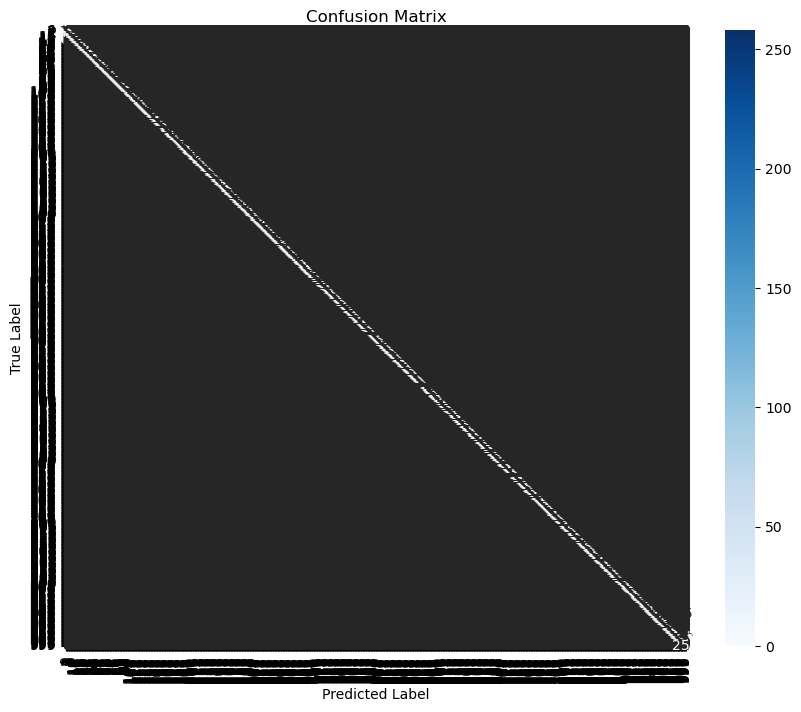

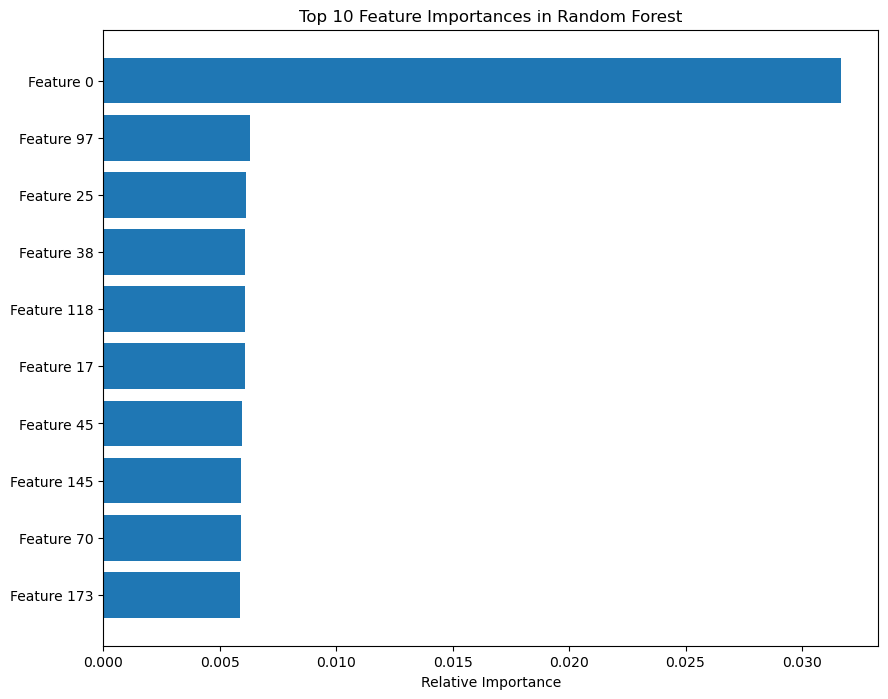

: 

In [ ]:
'''
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Step 1: Confusion Matrix
conf_matrix = confusion_matrix(y_val, rf_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 2: Feature Importance Plot
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[-10:]  # Show top 10 features for simplicity
plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [f"Feature {i}" for i in indices])
plt.xlabel("Relative Importance")
plt.title("Top 10 Feature Importances in Random Forest")
plt.show()

# Step 3: ROC Curve for each class (multi-class ROC)
fpr = {}
tpr = {}
roc_auc = {}

for i in np.unique(y_val):
    fpr[i], tpr[i], _ = roc_curve(y_val == i, rf_clf.predict_proba(X_val)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in np.unique(y_val):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Class")
plt.legend(loc="best")
plt.show()

# Step 4: Distribution of Predicted Probabilities for a Sample Class
class_index = 0  # Change this to another class to see different distributions
predicted_probabilities = rf_clf.predict_proba(X_val)[:, class_index]
plt.figure(figsize=(10, 8))
sns.histplot(predicted_probabilities, bins=30, kde=True)
plt.title(f"Distribution of Predicted Probabilities for Class {class_index}")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()
'''